In [10]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests


# Helper functions
def read_data(u: str):
    url = u
    cookies = {'session':'53616c7465645f5fabffa0db29ce631d051791fd732f773acffb29b7f6d517d590495beba259eeaf773eaffe0ce1f5229e63c9c2310a7c0fd4e8cf2933f5fbf5'}
    session = requests.Session()
    session.cookies.update(cookies)
    page = session.get(url)
    soup = BeautifulSoup(page.text, "html.parser")

    return soup

def list_of_ints(l) -> list:
    # converts a set of 'vertically' listed string-integers to a list of integers by:
    # 1. stripping returns and replacing them with spaces
    # 2. splitting the elements of the list
    # 3. mapping the string integers to a list of integers
    lst_of_ints = list(map(int,(str(l).replace("/n"," ").strip()).split()))
    return lst_of_ints

In [12]:
#part1

input = list_of_ints(read_data('https://adventofcode.com/2021/day/1/input'))

counter_1 = 0
for i in range(len(input)-1):
    if input[i]-input[i+1] < 0:
        counter_1 += 1

counter_1

1564

In [13]:
#part2 - 3days rolling window
counter_2 = 0

sliding_window = []

for i in range (0,len(input)-2):
    sliding_window.append(input[i]+input[i+1]+input[i+2])


for i in range(len(sliding_window)-1):
    if sliding_window[i]-sliding_window[i+1] < 0:
        counter_2 += 1

counter_2

1611

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

In [21]:
df_measurements = pd.DataFrame({'Single_Measurements': input[:-2],'Sliding_Window': sliding_window})

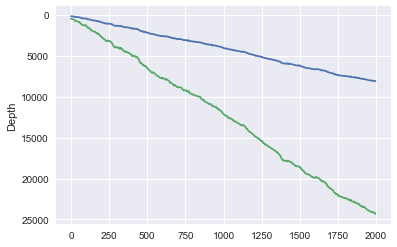

In [26]:
plt.plot(df_measurements); plt.ylabel('Depth'); plt.gca().invert_yaxis();